In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def order_book(month,day):
    data = []
    datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/High_Frequency_Trading_Strategy_using_machine_learning/Limit_Order_Book_Best_3/order_book_3_2014'\
                + '_' + str(month) + '_' + str(day) + '.csv'
    order_book = pd.read_csv(datapath,sep=',')#,encoding = 'utf-8')
    bid_price_1 = np.array(map(float,order_book['Bid'][1::4]))/100.0
    bid_price_2 = np.array(map(float,order_book['Bid'][2::4]))/100.0
    bid_price_3 = np.array(map(float,order_book['Bid'][3::4]))/100.0
    timestamp = np.array(order_book['Bid_Quantity'][0::4])
    bid_quantity_1 = np.array(map(float,order_book['Bid_Quantity'][1::4]))
    bid_quantity_2 = np.array(map(float,order_book['Bid_Quantity'][2::4]))
    bid_quantity_3 = np.array(map(float,order_book['Bid_Quantity'][3::4]))
    ask_price_1 = np.array(map(float,order_book['Ask'][1::4]))/100.0
    ask_price_2 = np.array(map(float,order_book['Ask'][2::4]))/100.0
    ask_price_3 = np.array(map(float,order_book['Ask'][3::4]))/100.0
    ask_quantity_1 = np.array(map(float,order_book['Ask_Quantity'][1::4]))
    ask_quantity_2 = np.array(map(float,order_book['Ask_Quantity'][2::4]))
    ask_quantity_3 = np.array(map(float,order_book['Ask_Quantity'][3::4]))
    return timestamp,order_book,bid_price_1,bid_price_2,bid_price_3,bid_quantity_1,\
            bid_quantity_2,bid_quantity_3,ask_price_1,ask_price_2,ask_price_3,ask_quantity_1,\
            ask_quantity_2,ask_quantity_3

In [3]:
def time_transform(timestamp_time):
    time_second_basic = []
    time_second = []
    for i in range(0,len(timestamp_time),1):
        second = float(timestamp_time[i][11])*36000 + float(timestamp_time[i][12])*3600+\
                    float(timestamp_time[i][14])*600 + float(timestamp_time[i][15])*60+\
                    float(timestamp_time[i][17])*10 + float(timestamp_time[i][18])  
        time_second_basic.append(second - 32400.0)
        time_second.append(second)
    return np.array(time_second),np.array(time_second_basic)

In [5]:
month = 1
day = 2
timestamp,order_book,bid_price_1,bid_price_2,bid_price_3,\
bid_quantity_1,bid_quantity_2,bid_quantity_3,\
ask_price_1,ask_price_2,ask_price_3,ask_quantity_1,\
ask_quantity_2,ask_quantity_3 = order_book(month,day)

In [6]:
time_second,time_second_basic = time_transform(timestamp)

In [36]:
# 09:00 ~ 09:15
time1 = 0
time2 = 900
# 09:15 ~ 11:30
time1 = 900+1
time2 = 9000
# 11:30 ~ 1:00
time1 = 9000+1
time2 = 14400
# 01:00 ~ 16:00
time1 = 14400+1
time2 = 25200

traded = []
for i in range(time1,time2,1):
    index = np.where(time_second_basic <= i)[0][-1]
    if i < 25200 - 900:
        index_15_min = np.where(time_second_basic <= i + 900)[0][-1]
        if bid_price_1[index] > min(ask_price_1[index:index_15_min]):
            traded.append(1)
        else:
            traded.append(0)
    #print index,index_15_min
len(np.where(np.array(traded) == 0)[0]),len(np.where(np.array(traded) == 1)[0])

(2, 898)

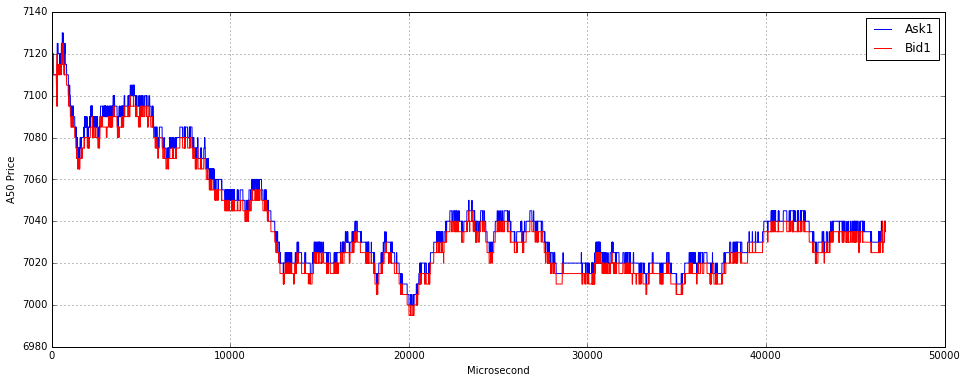

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,6))
plt.grid()
plot(ask_price_1[2:len(ask_price_1)],label = 'Ask1',color = 'b')
plot(bid_price_1[2:len(ask_price_1)],label = 'Bid1',color = 'r')
plt.ylim(6980,7140)
plt.xlabel("Microsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

#### Bid 1 & Ask 1

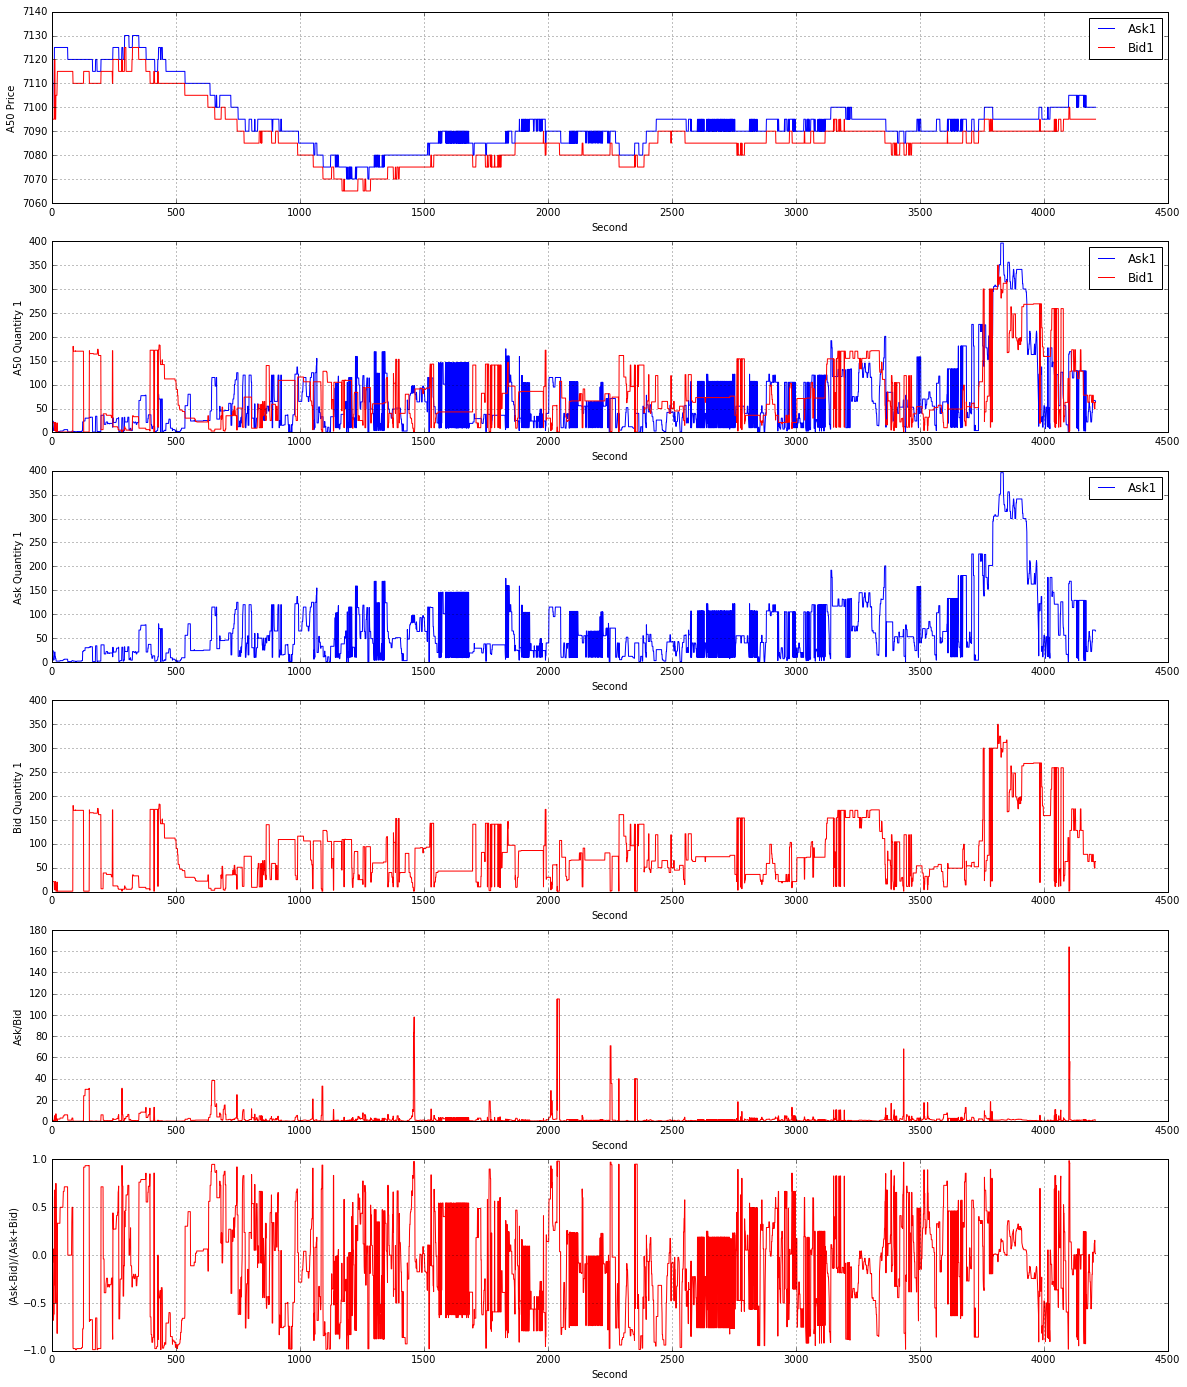

In [13]:
#Open 0 ~ 09:15
time1 = 294
time2 = 4504
plt.figure(figsize = (20,24))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7060,7140)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 1")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 1")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 1")
plt.subplot(615)
plt.grid()
plot(ask_quantity_1[time1:time2]/bid_quantity_1[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_1[time1:time2]-bid_quantity_1[time1:time2])/\
     (ask_quantity_1[time1:time2]+bid_quantity_1[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

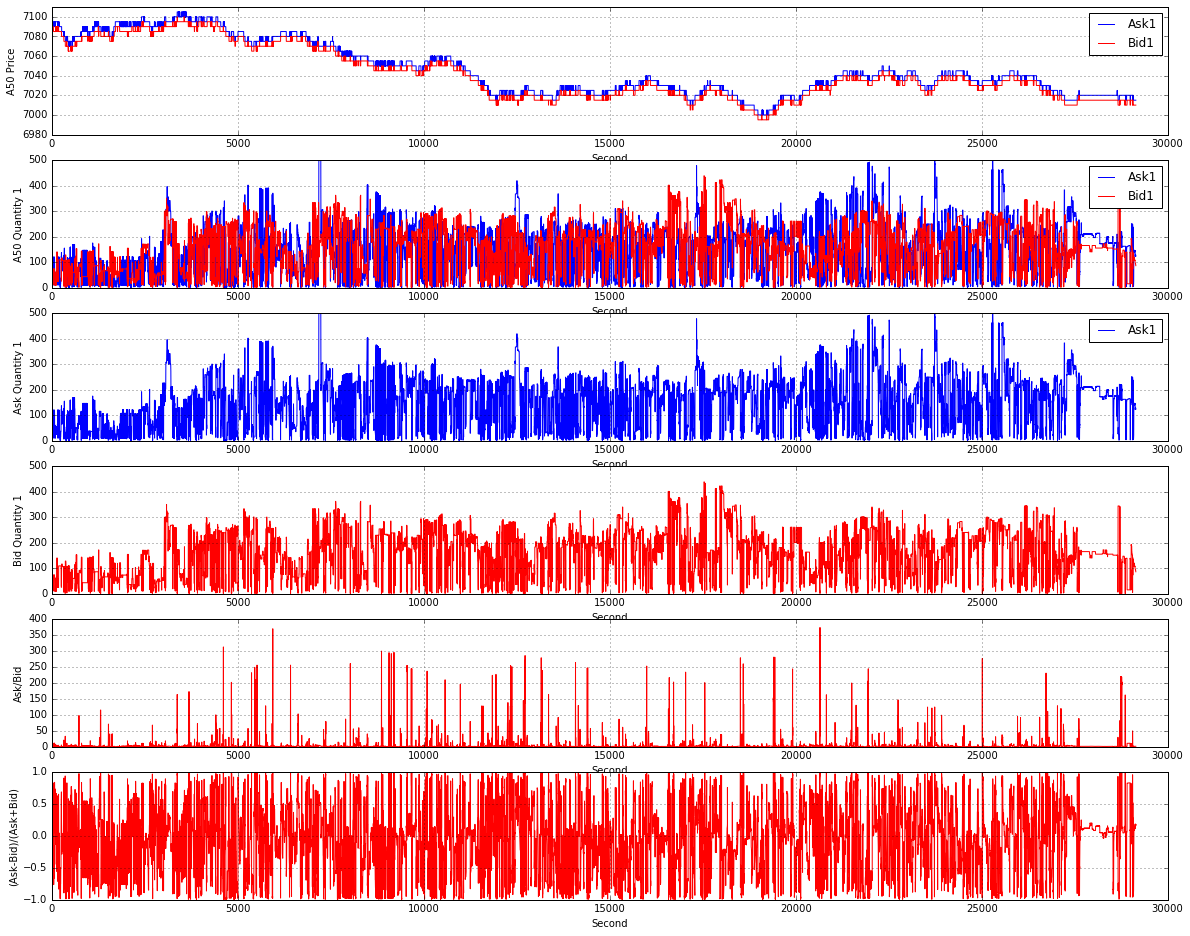

In [14]:
#Open 09:15 ~ 11:30
time1 = 1023
time2 = 30167
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(6980,7110)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 1")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 1")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 1")

plt.subplot(615)
plt.grid()
plot(ask_quantity_1[time1:time2]/bid_quantity_1[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_1[time1:time2]-bid_quantity_1[time1:time2])/\
     (ask_quantity_1[time1:time2]+bid_quantity_1[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

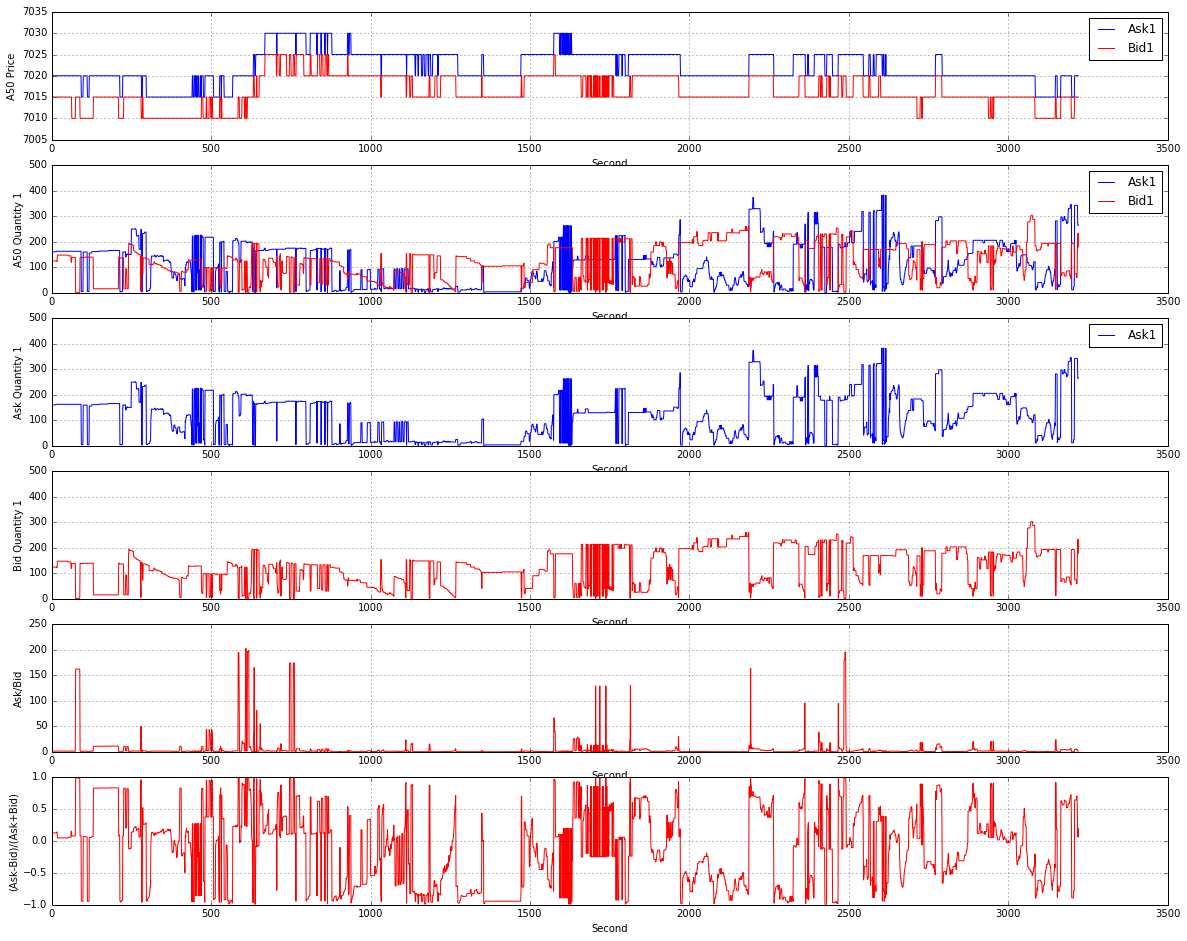

In [15]:
#Open 11:30 ~ 13:00 => china close
time1 = 29799
time2 = 33020
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7005,7035)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 1")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 1")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 1")

plt.subplot(615)
plt.grid()
plot(ask_quantity_1[time1:time2]/bid_quantity_1[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_1[time1:time2]-bid_quantity_1[time1:time2])/\
     (ask_quantity_1[time1:time2]+bid_quantity_1[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

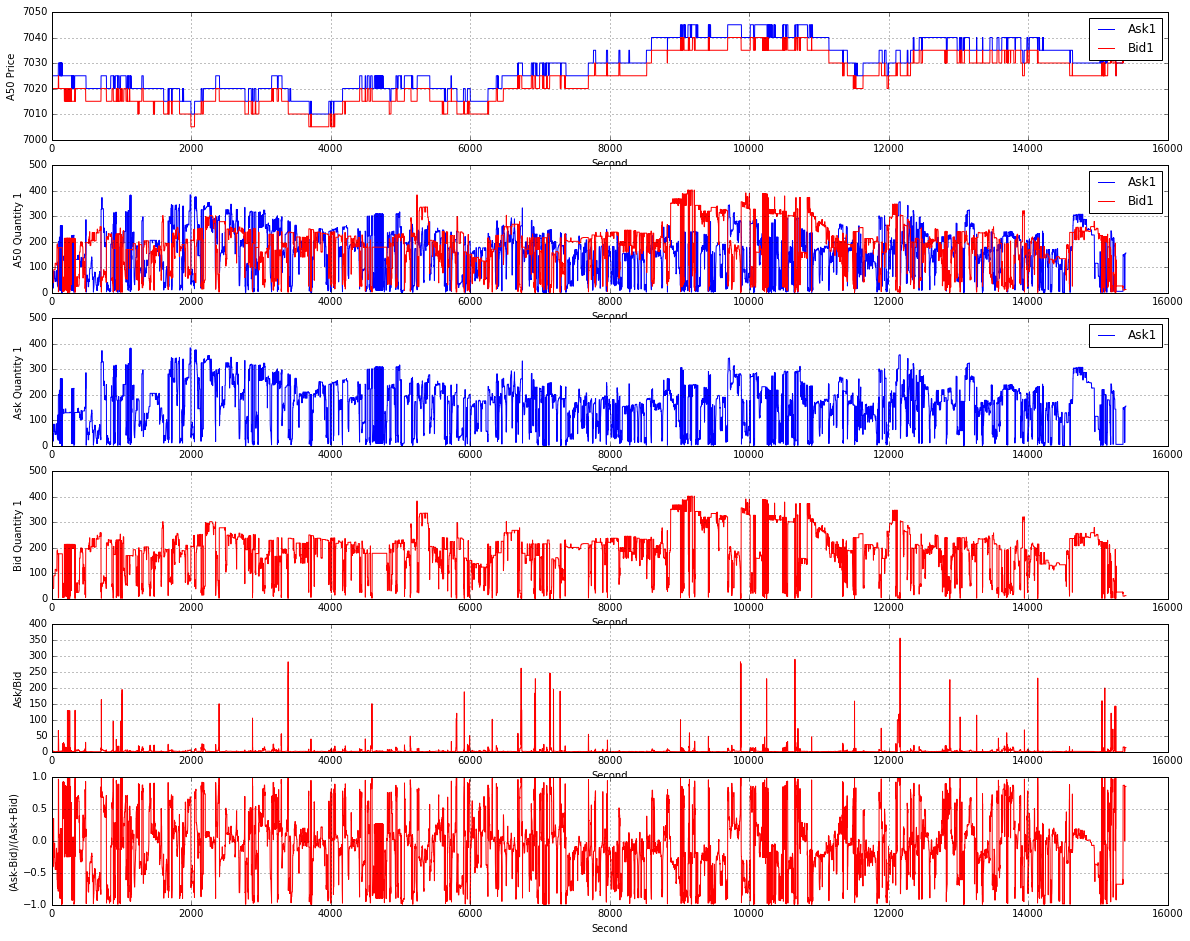

In [16]:
#Open 13:00 ~ 16:00
time1 = 31279
time2 = 46681
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7000,7050)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 1")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 1")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 1")

plt.subplot(615)
plt.grid()
plot(ask_quantity_1[time1:time2]/bid_quantity_1[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_1[time1:time2]-bid_quantity_1[time1:time2])/\
     (ask_quantity_1[time1:time2]+bid_quantity_1[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

#### Bid2 & Ask2

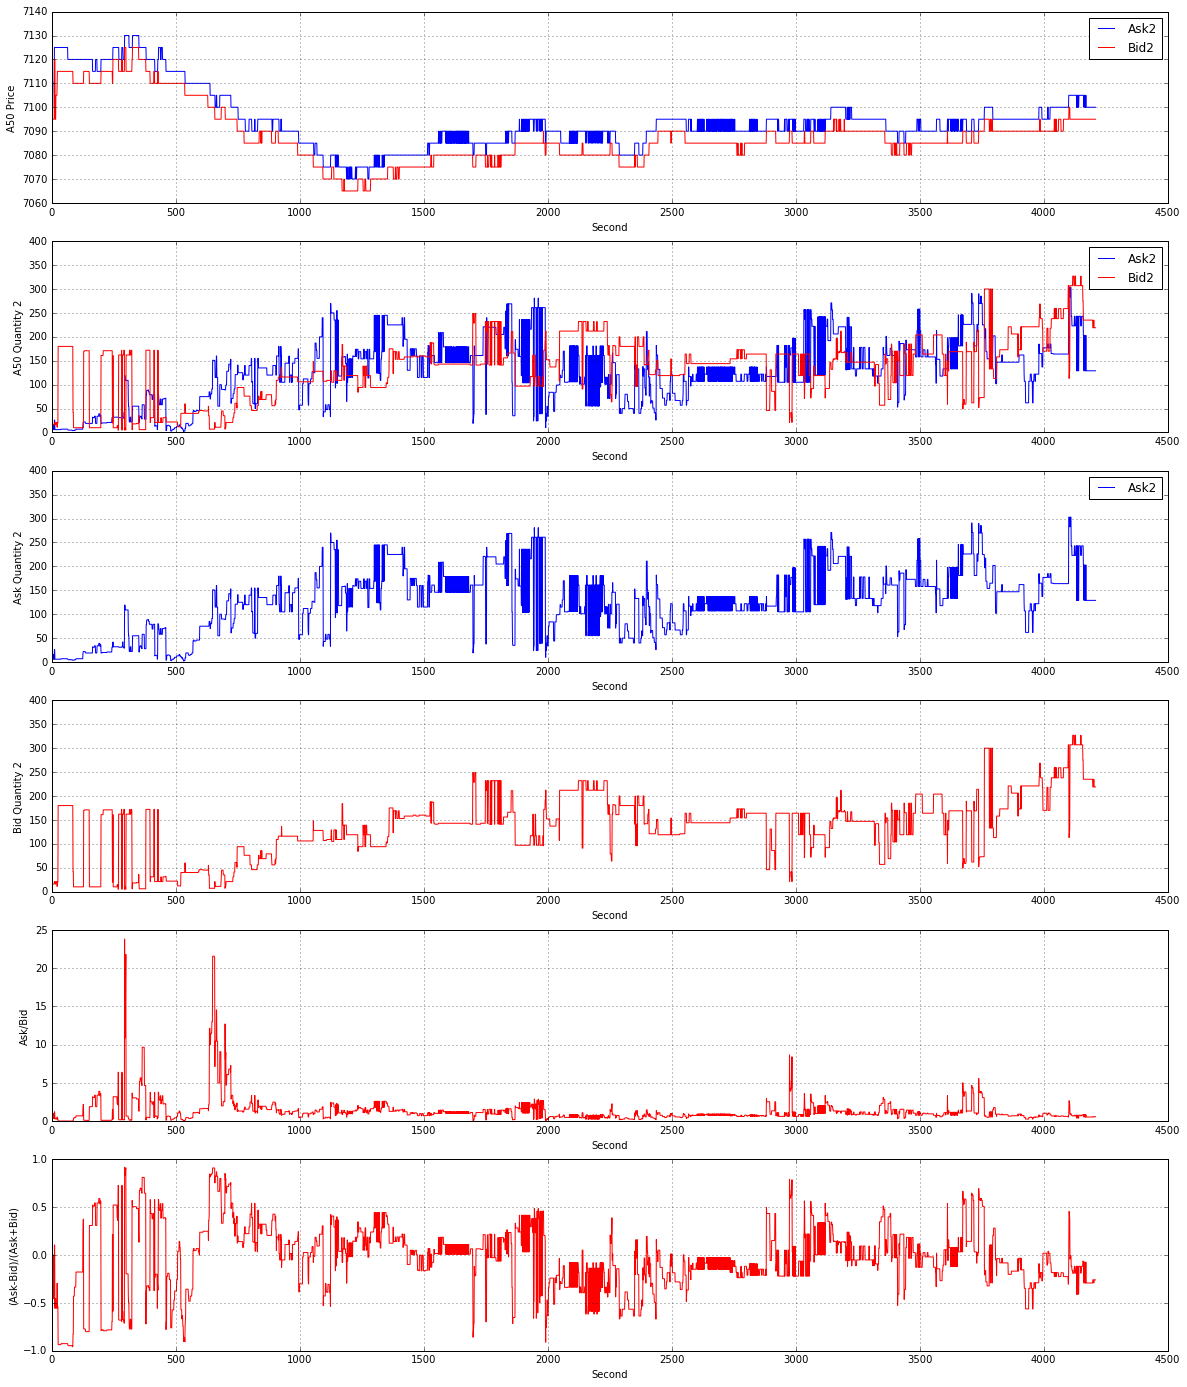

In [38]:
#Open 0 ~ 09:15
time1 = 294
time2 = 4504
plt.figure(figsize = (20,24))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask2',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(7060,7140)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 2")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 2")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 2")
plt.subplot(615)
plt.grid()
plot(ask_quantity_2[time1:time2]/bid_quantity_2[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_2[time1:time2]-bid_quantity_2[time1:time2])/\
     (ask_quantity_2[time1:time2]+bid_quantity_2[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

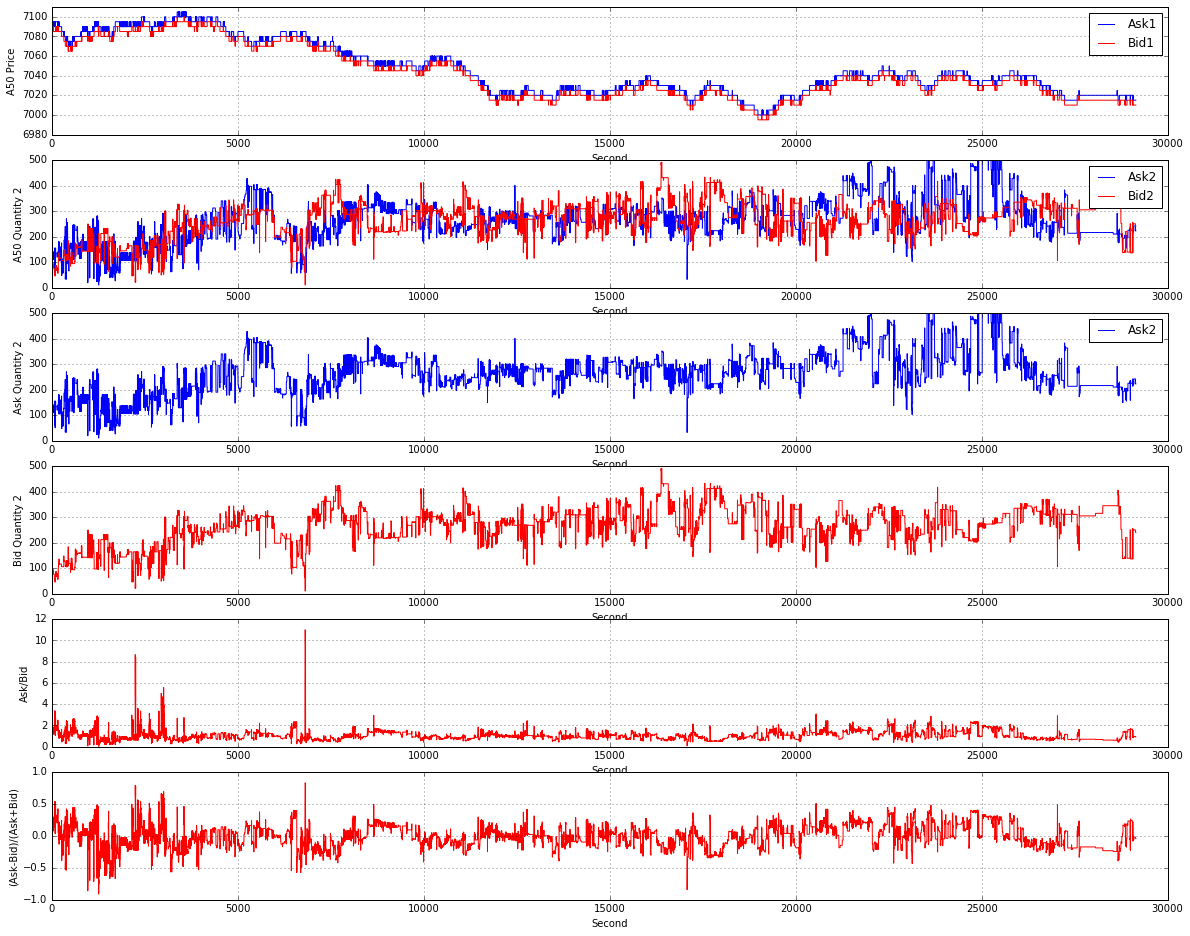

In [39]:
#Open 09:15 ~ 11:30
time1 = 1023
time2 = 30167
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(6980,7110)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 2")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 2")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 2")

plt.subplot(615)
plt.grid()
plot(ask_quantity_2[time1:time2]/bid_quantity_2[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_2[time1:time2]-bid_quantity_2[time1:time2])/\
     (ask_quantity_2[time1:time2]+bid_quantity_2[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

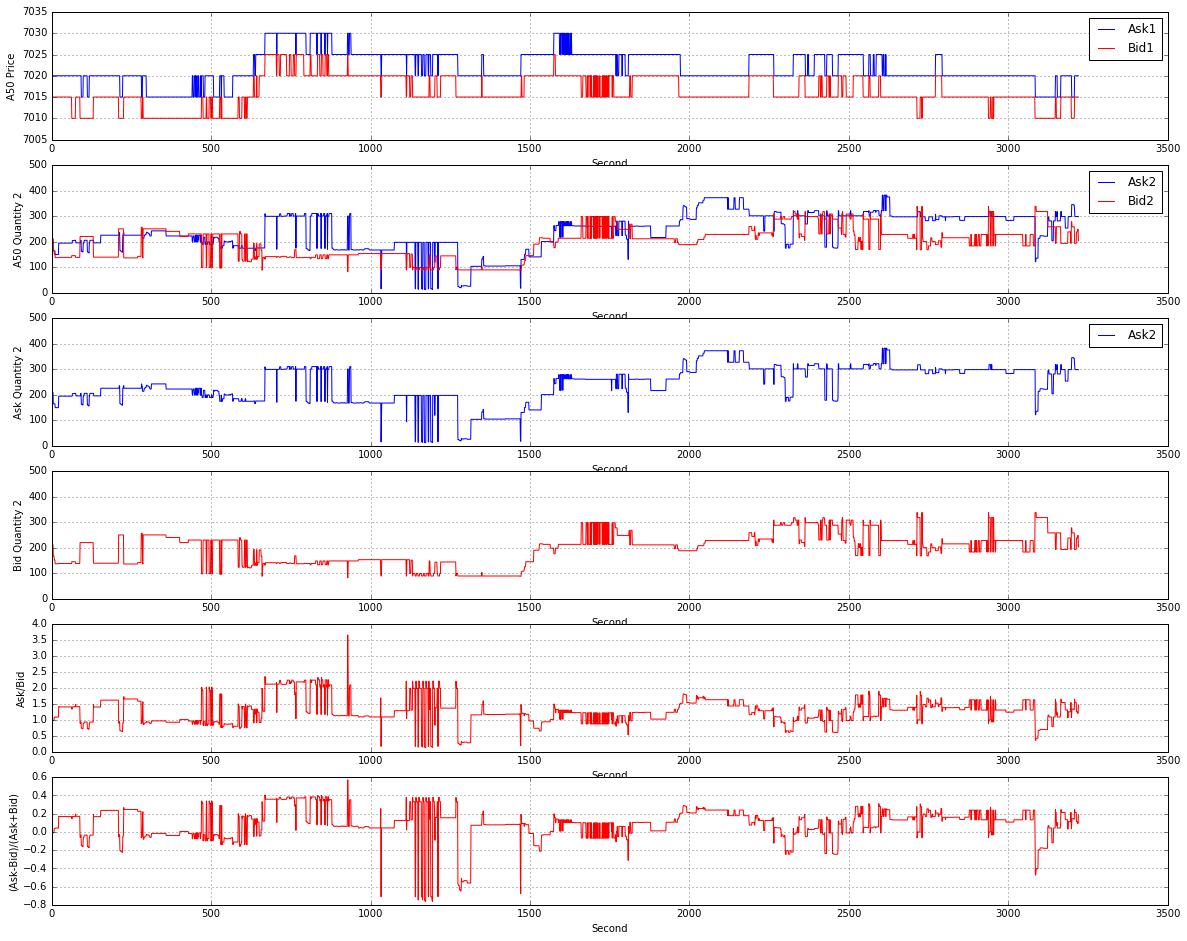

In [40]:
#Open 11:30 ~ 13:00 => china close
time1 = 29799
time2 = 33020
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7005,7035)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 2")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 2")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 2")

plt.subplot(615)
plt.grid()
plot(ask_quantity_2[time1:time2]/bid_quantity_2[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_2[time1:time2]-bid_quantity_2[time1:time2])/\
     (ask_quantity_2[time1:time2]+bid_quantity_2[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

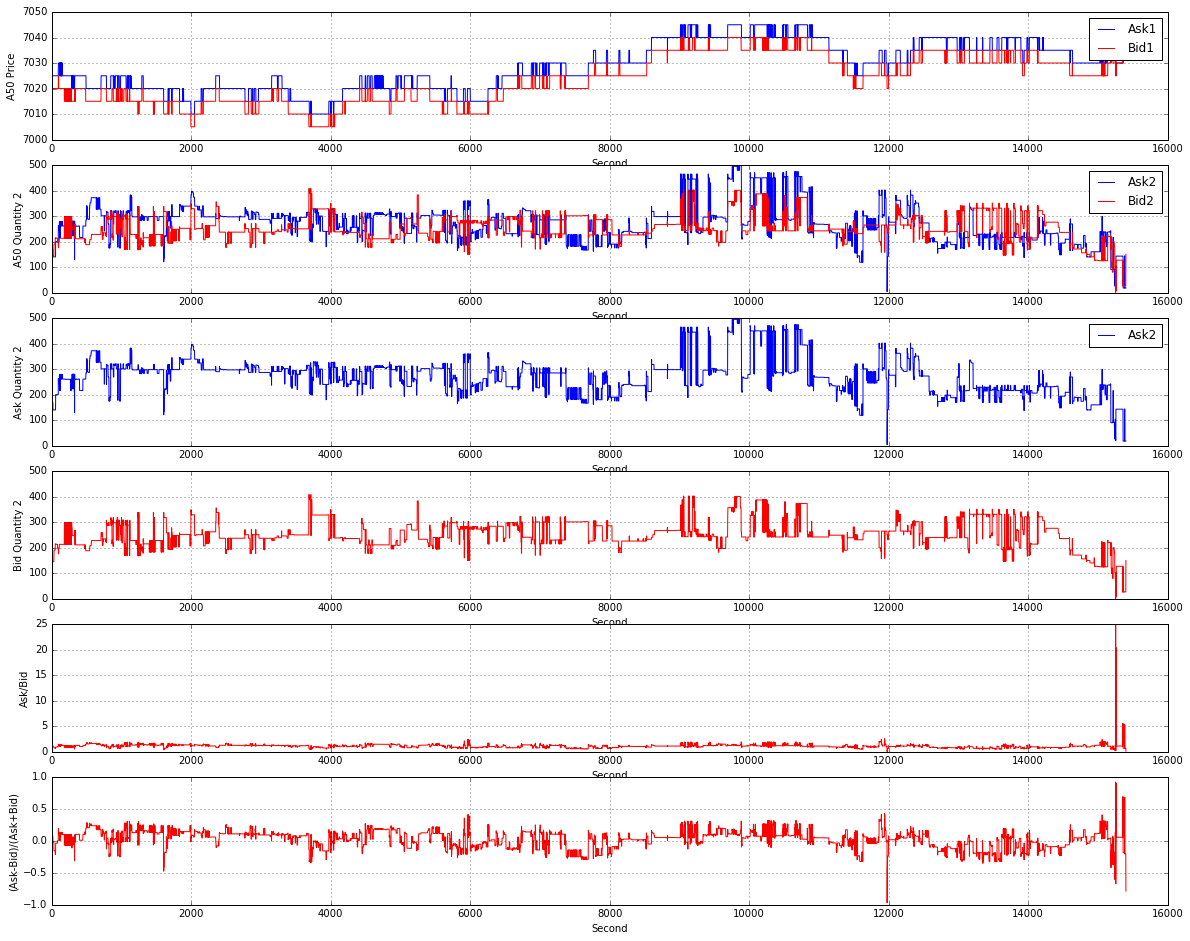

In [41]:
#Open 13:00 ~ 16:00
time1 = 31279
time2 = 46681
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7000,7050)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 2")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 2")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 2")

plt.subplot(615)
plt.grid()
plot(ask_quantity_2[time1:time2]/bid_quantity_2[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_2[time1:time2]-bid_quantity_2[time1:time2])/\
     (ask_quantity_2[time1:time2]+bid_quantity_2[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

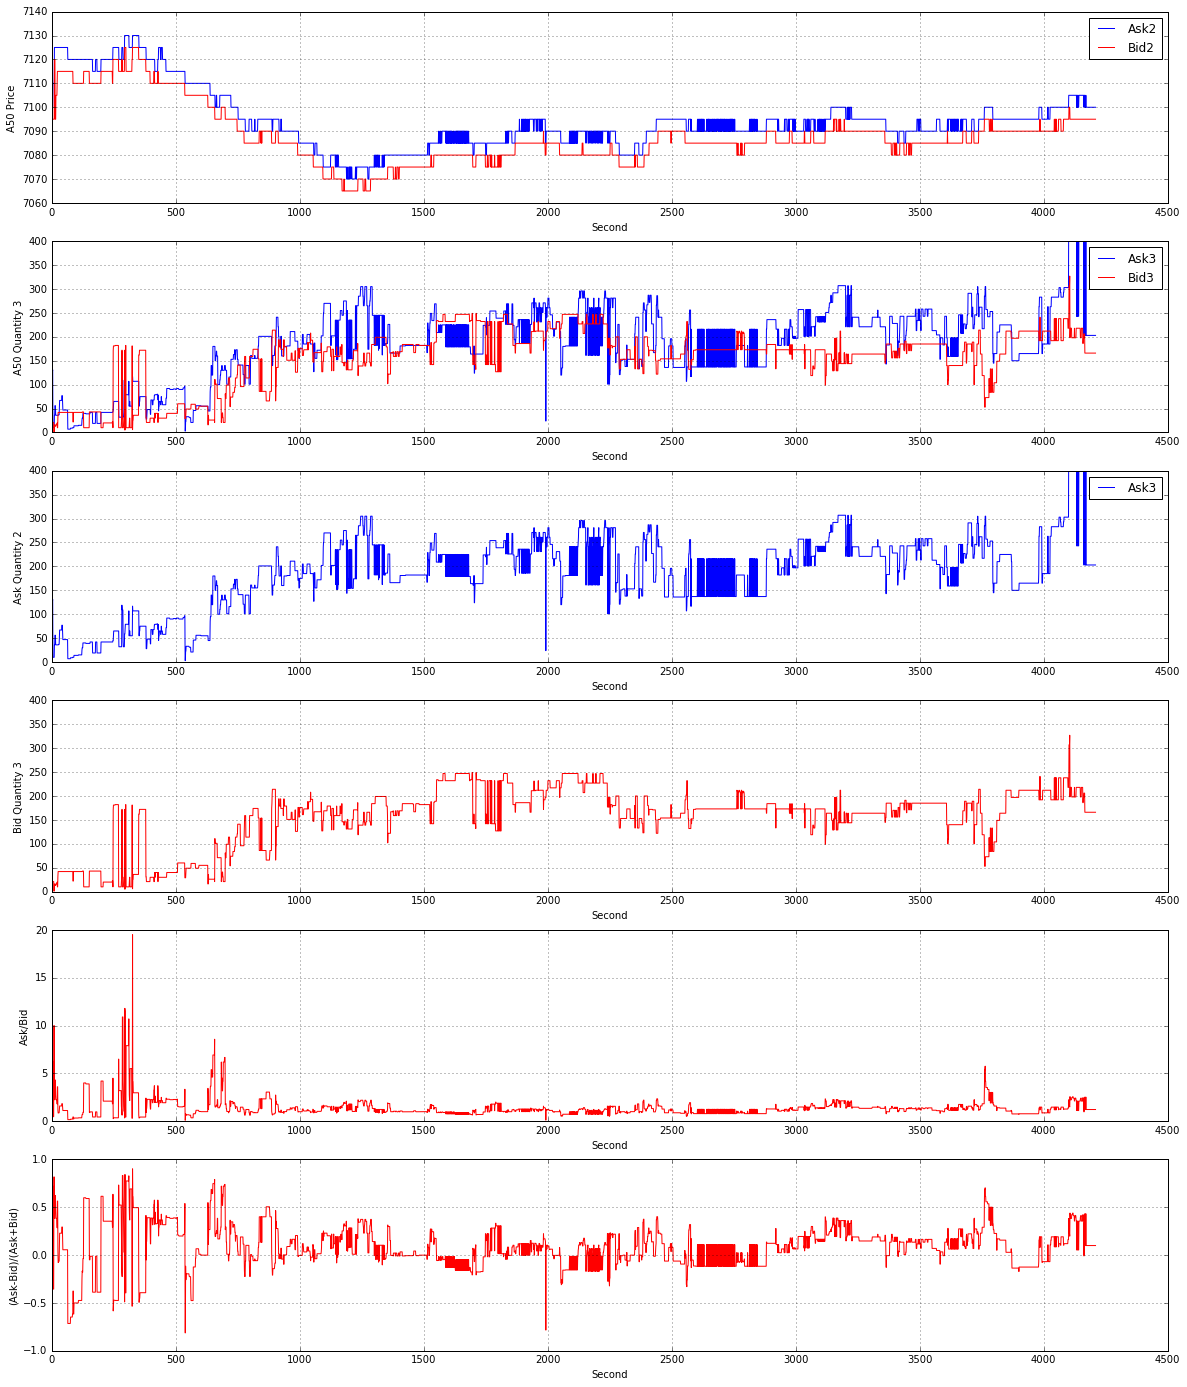

In [42]:
#Open 0 ~ 09:15
time1 = 294
time2 = 4504
plt.figure(figsize = (20,24))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask2',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(7060,7140)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 3")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 2")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 3")
plt.subplot(615)
plt.grid()
plot(ask_quantity_3[time1:time2]/bid_quantity_3[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_3[time1:time2]-bid_quantity_3[time1:time2])/\
     (ask_quantity_3[time1:time2]+bid_quantity_3[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

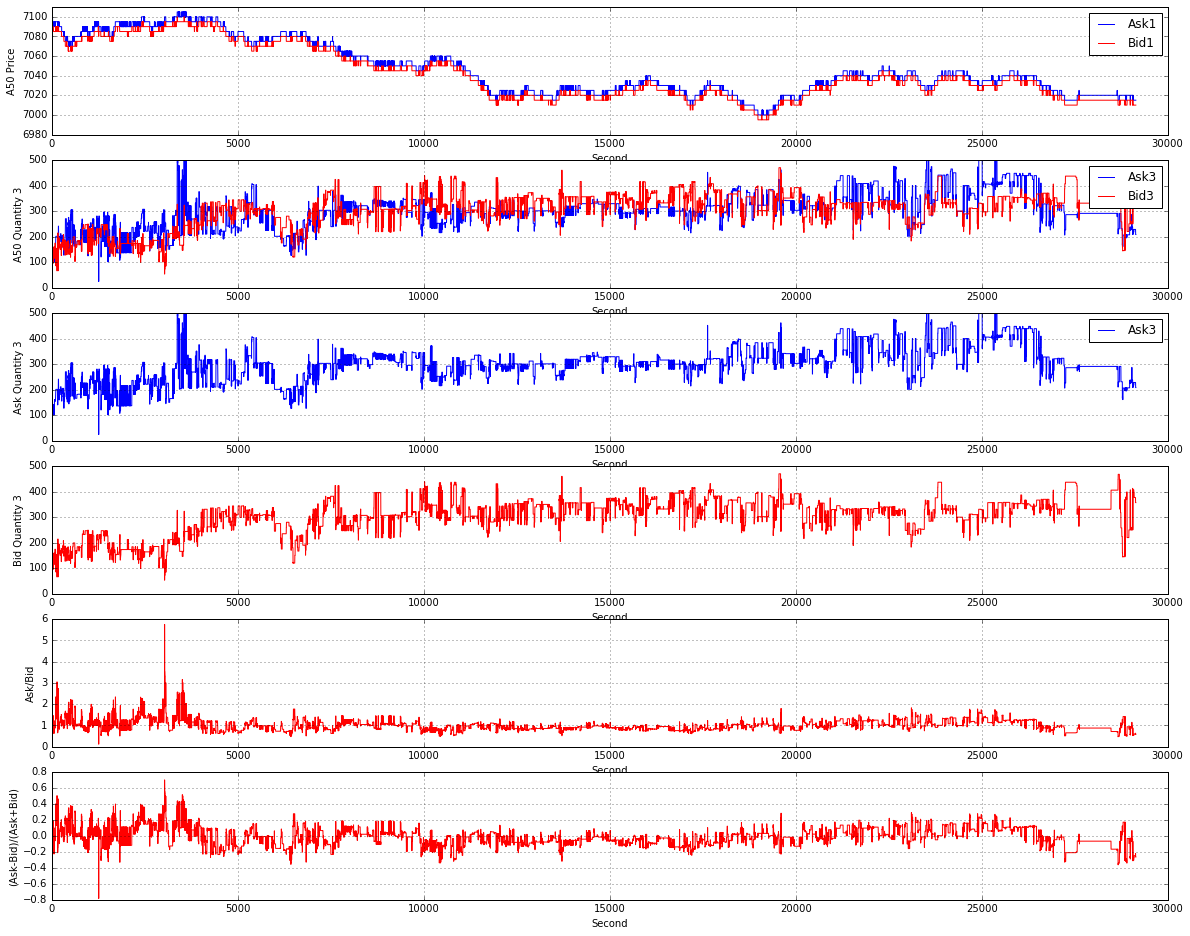

In [43]:
#Open 09:15 ~ 11:30
time1 = 1023
time2 = 30167
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(6980,7110)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 3")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 3")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 3")

plt.subplot(615)
plt.grid()
plot(ask_quantity_3[time1:time2]/bid_quantity_3[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_3[time1:time2]-bid_quantity_3[time1:time2])/\
     (ask_quantity_3[time1:time2]+bid_quantity_3[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

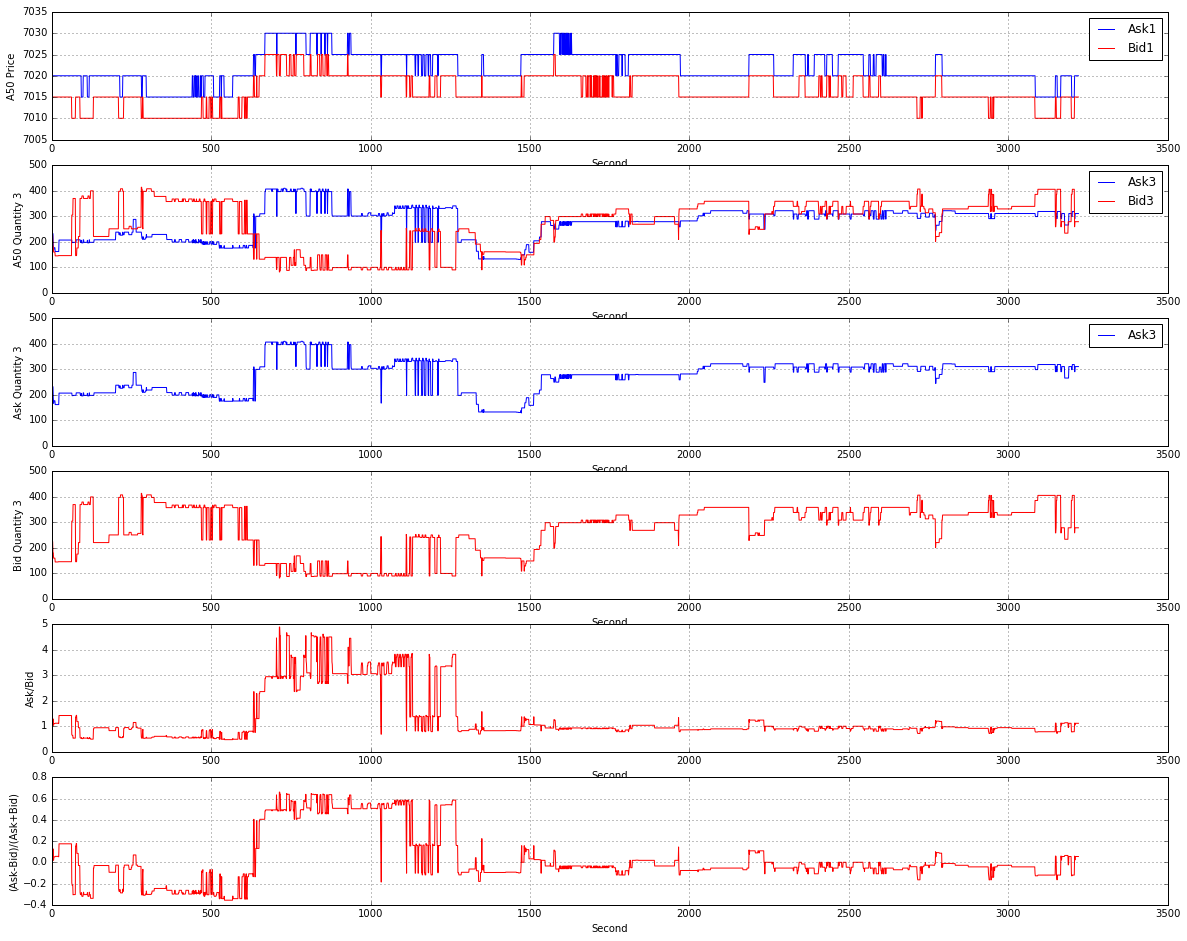

In [44]:
#Open 11:30 ~ 13:00 => china close
time1 = 29799
time2 = 33020
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7005,7035)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 3")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 3")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 3")

plt.subplot(615)
plt.grid()
plot(ask_quantity_3[time1:time2]/bid_quantity_3[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_3[time1:time2]-bid_quantity_3[time1:time2])/\
     (ask_quantity_3[time1:time2]+bid_quantity_3[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

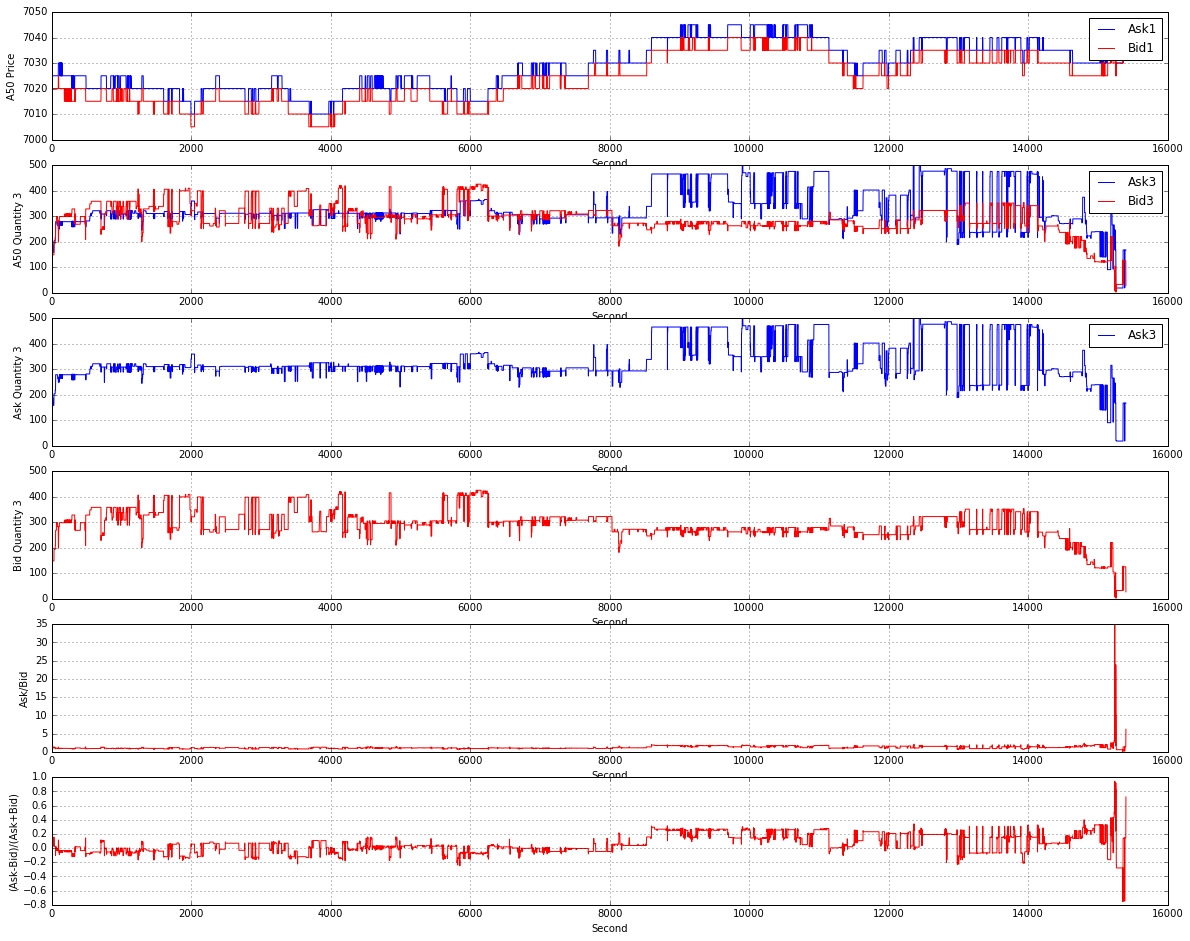

In [45]:
#Open 13:00 ~ 16:00
time1 = 31279
time2 = 46681
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7000,7050)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 3")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 3")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 3")

plt.subplot(615)
plt.grid()
plot(ask_quantity_3[time1:time2]/bid_quantity_3[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_3[time1:time2]-bid_quantity_3[time1:time2])/\
     (ask_quantity_3[time1:time2]+bid_quantity_3[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")